In [1]:
from functions import *

%load_ext autoreload
%autoreload 2

In [2]:
if os.path.exists('common_res'):
    pass
else:
    os.mkdir('common_res')

In [3]:
ctrl4m = ['Cell 1 ctrl 4m', 'Cell 2 ctrl 4m', 'Cell 3 ctrl 4m', 'Cell 4 ctrl 4m']
ctrl8m = ['Cell 1 ctrl 8m', 'Cell 2 ctrl 8m', 'Cell 3 ctrl 8m', 'Cell 4 ctrl 8m']
ad4m = ['Cell 1 ad 4m', 'Cell 2 ad 4m', 'Cell 3 ad 4m', 'Cell 4 ad 4m', 'Cell 5 ad 4m', 'Cell 6 ad 4m', 'Cell 7 ad 4m']
ad8m = ['Cell 1 ad 8m', 'Cell 4 ad 8m', 'Cell 6 ad 8m']

In [4]:
files = [ctrl4m, ctrl8m, ad4m, ad8m]

Electric cell parameters

In [5]:
electric_param = {}
r_s = {}
for f in files:
    for item in f:
        electric_param[item] = pd.read_csv(f'{item}\electric_cell_param.csv')
        r_s[item] = np.array(electric_param[item]['R_s, Mohm'])

In [6]:
lengths = {}
for k, v in r_s.items():
    lengths[k] = len(v)
    
max_length = max(lengths.values())

In [28]:
r_s_for_df = {}
for k, v in r_s.items():
    r_s_for_df[k] = np.array([None] * max_length, dtype=np.float)
    r_s_for_df[k][:len(v)] = v

In [42]:
r_s_df = pd.DataFrame.from_dict(r_s_for_df)

In [45]:
r_s_df['sweep_number'] = [i for i in range(max_length)]

In [46]:
r_s_df

,Cell 1 ctrl 4m,Cell 2 ctrl 4m,Cell 3 ctrl 4m,Cell 4 ctrl 4m,Cell 1 ctrl 8m,Cell 2 ctrl 8m,Cell 3 ctrl 8m,Cell 4 ctrl 8m,Cell 1 ad 4m,Cell 2 ad 4m,Cell 3 ad 4m,Cell 4 ad 4m,Cell 5 ad 4m,Cell 6 ad 4m,Cell 7 ad 4m,Cell 1 ad 8m,Cell 4 ad 8m,Cell 6 ad 8m,sweep_number
0,35.597064,40.552203,48.612137,59.350683,35.313816,42.963769,39.078721,114.853259,52.449032,37.733251,22.188798,60.891159,89.262962,42.883031,65.353662,87.405525,55.670969,33.061236,0
1,34.983952,44.701003,52.894837,53.472817,40.760175,33.859288,40.585200,113.112785,54.509076,40.916609,22.334441,66.396908,98.178538,38.176492,62.671166,76.338625,57.235350,33.156125,1
2,36.248685,43.921324,55.956472,57.443930,50.117671,39.660354,43.479665,101.605402,48.324415,39.683254,22.712467,65.015428,94.089136,41.965957,73.869596,81.696002,52.164465,32.905587,2
3,36.827937,43.653171,60.152907,59.992282,43.773532,39.585830,46.913929,106.599315,55.798103,40.097727,21.545363,63.441802,93.869903,45.333826,72.237843,97.606059,56.697790,33.831144,3
4,36.335021,44.235655,52.520642,55.167944,48.113932,37.529942,43.958615,118.370114,63.509397,38.654265,21.296663,63.694358,87.678528,44.855533,79.784366,111.625820,57.075443,32.969799,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.961742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.553060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.471639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.864663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196


In [47]:
start_ser = [0, 54, 100, 162]
stop_ser = [30, 72, 118, 198]

In [48]:
def series_numeration(x):
    results_keys = ['CTRL', 'GABA1', 'GABA5', 'PTX']
    for i in range(len(start_ser)):
        if start_ser[i] <= x <= stop_ser[i]:
            return results_keys[i]

In [49]:
r_s_df['series'] = r_s_df.sweep_number.apply(series_numeration)

In [50]:
r_s_df

,Cell 1 ctrl 4m,Cell 2 ctrl 4m,Cell 3 ctrl 4m,Cell 4 ctrl 4m,Cell 1 ctrl 8m,Cell 2 ctrl 8m,Cell 3 ctrl 8m,Cell 4 ctrl 8m,Cell 1 ad 4m,Cell 2 ad 4m,Cell 3 ad 4m,Cell 4 ad 4m,Cell 5 ad 4m,Cell 6 ad 4m,Cell 7 ad 4m,Cell 1 ad 8m,Cell 4 ad 8m,Cell 6 ad 8m,sweep_number,series
0,35.597064,40.552203,48.612137,59.350683,35.313816,42.963769,39.078721,114.853259,52.449032,37.733251,22.188798,60.891159,89.262962,42.883031,65.353662,87.405525,55.670969,33.061236,0,CTRL
1,34.983952,44.701003,52.894837,53.472817,40.760175,33.859288,40.585200,113.112785,54.509076,40.916609,22.334441,66.396908,98.178538,38.176492,62.671166,76.338625,57.235350,33.156125,1,CTRL
2,36.248685,43.921324,55.956472,57.443930,50.117671,39.660354,43.479665,101.605402,48.324415,39.683254,22.712467,65.015428,94.089136,41.965957,73.869596,81.696002,52.164465,32.905587,2,CTRL
3,36.827937,43.653171,60.152907,59.992282,43.773532,39.585830,46.913929,106.599315,55.798103,40.097727,21.545363,63.441802,93.869903,45.333826,72.237843,97.606059,56.697790,33.831144,3,CTRL
4,36.335021,44.235655,52.520642,55.167944,48.113932,37.529942,43.958615,118.370114,63.509397,38.654265,21.296663,63.694358,87.678528,44.855533,79.784366,111.625820,57.075443,32.969799,4,CTRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.961742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193,PTX
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.553060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194,PTX
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.471639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195,PTX
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.864663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196,PTX


<AxesSubplot:xlabel='series', ylabel='Cell 1 ctrl 4m'>

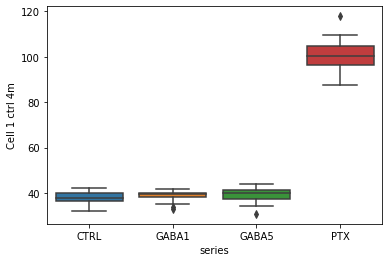

In [57]:
sns.boxplot(data=r_s_df, x='series', y="Cell 1 ctrl 4m")

In [52]:
df = pd.DataFrame(np.random.randn(4, 4), columns=['a','b','c','z'])

In [53]:
arrays = [['устройство', 'устройство', 'устройство', 'место'], df.columns]
df.columns = pd.MultiIndex.from_arrays(arrays)

In [55]:
df

устройство                         место
           a         b         c         z
0  -0.001901 -1.848166 -0.013606 -0.229290
1  -1.771278 -0.843247 -0.248356 -0.088455
2   1.503546  1.638035  1.552481  1.378943
3  -0.540296 -1.731107  0.173818  0.514195

In [56]:
sns.boxplot(data=df, x="место", y="устройство")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Baseline parameters

In [41]:
# baseline_param = {}
# i_h = {}
# i_h_noise = {}
# for f in files:
#     for item in f:
#         baseline_param[item] = pd.read_csv(f'{item}\baseline_param.csv')
#         i_h[item] = np.array(electric_param[item]['Ihold, pA'])
#         i_h_noise[item] = np.array(electric_param[item]['Inoise, pA'])

Event parameters

Read all the files

In [3]:
event_param_cell1 = pd.read_csv('Cell 1 ad4\event_param.csv')
event_param_cell2 = pd.read_csv('Cell 2 ad4\event_param.csv')
event_param_cell3 = pd.read_csv('Cell 3 ad4\event_param.csv')
event_param_cell4 = pd.read_csv('Cell 4 ad4\event_param.csv')
event_param_cell5 = pd.read_csv('Cell 5 ad4\event_param.csv')
event_param_cell6 = pd.read_csv('Cell 6 ad4\event_param.csv')
event_param_cell7 = pd.read_csv('Cell 7 ad4\event_param.csv')

In [4]:
frames = [event_param_cell1, event_param_cell2, event_param_cell3, event_param_cell4, event_param_cell5, event_param_cell6, event_param_cell7]
result = pd.concat(frames)

In [5]:
result_ctrl = result[result['series'] == 'CTRL']
result_gaba1 = result[result['series'] == 'GABA1']
result_gaba5 = result[result['series'] == 'GABA5']

In [6]:
frames2 = [result_ctrl, result_gaba1, result_gaba5]
result_3ser = pd.concat(frames2)
del result_3ser['Unnamed: 0']

In [7]:
result_3ser

,event_idx,spike_time,amplitudes,tau_decay,rise_rate_10_90,series,sweep
0,5678.0,5.687,35.337,8.145,1.505,CTRL,0
1,11165.0,11.183,39.659,20.440,2.534,CTRL,1
2,11428.0,11.446,42.154,9.974,0.067,CTRL,1
3,14874.0,14.898,35.171,7.721,1.563,CTRL,1
4,14886.0,14.910,30.545,5.387,9.300,CTRL,1
...,...,...,...,...,...,...,...
1177,1255657.0,1257.666,23.299,22.541,4.493,GABA5,125
1178,1255664.0,1257.673,15.760,21.305,1.454,GABA5,125
1179,1255695.0,1257.704,23.692,8.475,0.557,GABA5,125
1180,1255848.0,1257.857,23.696,13.586,5.266,GABA5,125


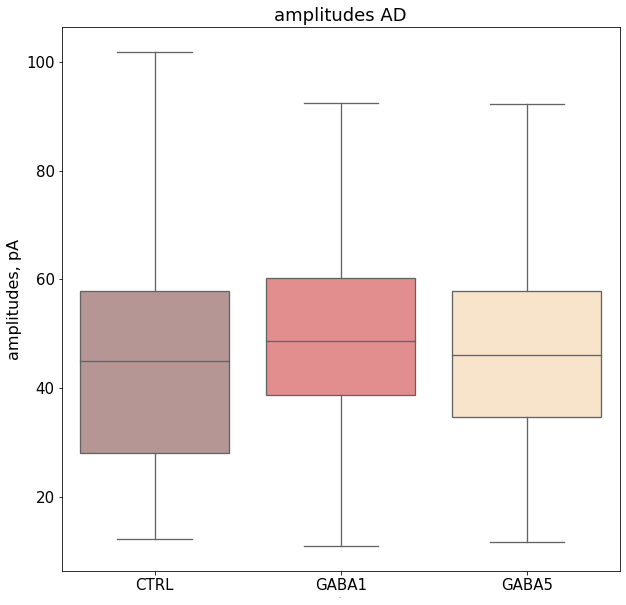

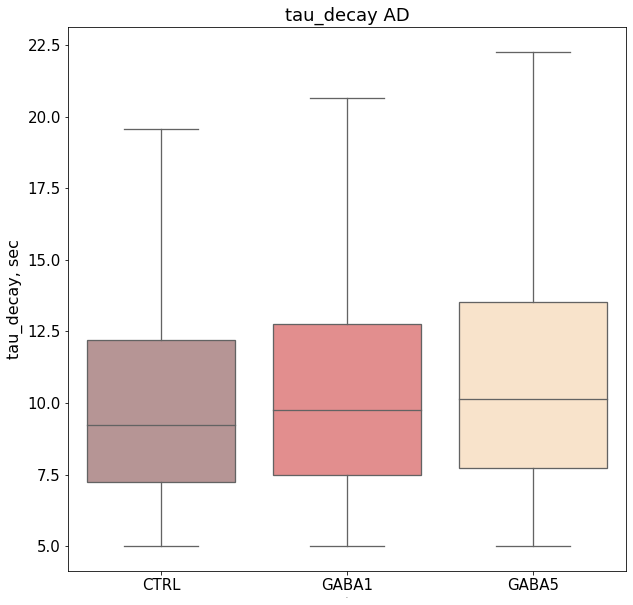

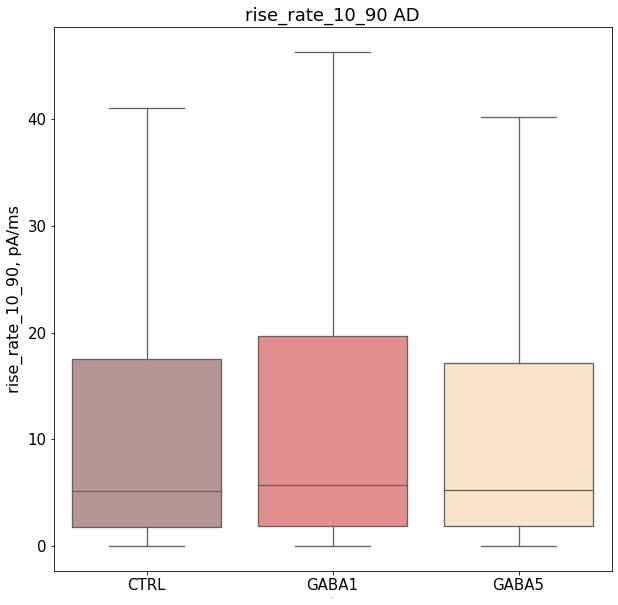

In [8]:
parametres = ['amplitudes', 'tau_decay', 'rise_rate_10_90']
lparametres = ['amplitudes, pA', 'tau_decay, sec', 'rise_rate_10_90, pA/ms']

for p, l in zip(parametres, lparametres):
    plt.figure(figsize = (10, 10))
    ax = sns.boxplot(x='series', y=p, data=result_3ser, palette  = ['rosybrown', 'lightcoral', 'bisque', 'paleturquoise'],
                     linewidth = 1.3, showfliers=False)
    #ax.set_title(p)
    ax.set_title(p + ' AD', fontsize=18)
    ax.set_xlabel('series', fontsize=0)
    ax.set_ylabel(l, fontsize=16);
    plt.xticks(fontsize=15, rotation=0)
    plt.yticks(fontsize=15, rotation=0)
    plt.savefig('AD_common_res/'f"{p}.png")
    plt.savefig('AD_common_res/'f"{p}.pdf")
plt.show();

In [9]:
temp_pd1 = result_3ser[result_3ser.series == 'CTRL'].describe().round(3)

In [10]:
temp_pd1[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,3977.000,3977.000,3977.000
mean,46.891,10.601,13.241
std,23.904,5.058,18.272
min,12.213,5.001,0.005
25%,28.084,7.256,1.773
50%,44.998,9.224,5.120
75%,57.880,12.197,17.494
max,262.361,39.994,190.663


In [11]:
temp_pd2 = result_3ser[result_3ser.series == 'GABA1'].describe().round(3)

In [12]:
temp_pd2[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,2368.000,2368.000,2368.000
mean,51.310,11.092,14.131
std,24.547,5.418,18.794
min,10.951,5.007,0.004
25%,38.692,7.497,1.873
50%,48.642,9.758,5.690
75%,60.282,12.763,19.676
max,366.326,39.586,166.378


In [13]:
temp_pd3 = result_3ser[result_3ser.series == 'GABA5'].describe().round(3)

In [14]:
temp_pd3[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,2638.000,2638.000,2638.000
mean,48.031,11.522,12.404
std,22.561,5.504,15.881
min,11.755,5.004,0.005
25%,34.736,7.726,1.852
50%,46.142,10.142,5.296
75%,57.897,13.545,17.188
max,410.777,39.548,102.353


Cumulative distributions

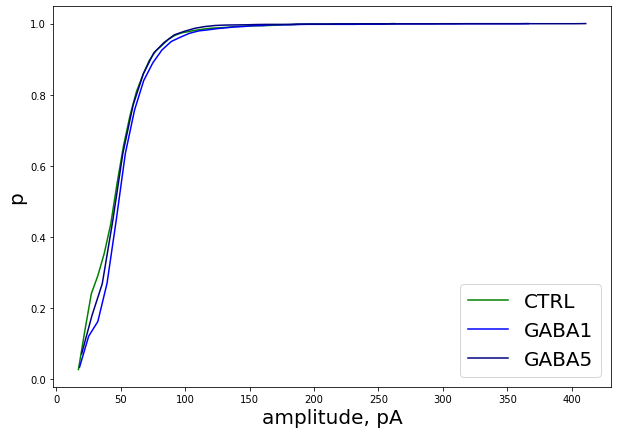

In [15]:
count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'CTRL']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA1']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA5']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('amplitude, pA', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_amplitude_p.png")
plt.savefig('AD_common_res/'"cum_amplitude_p.pdf")
plt.show()

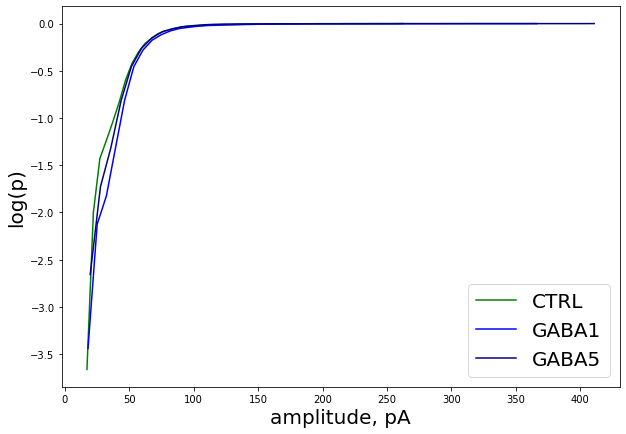

In [16]:
count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'CTRL']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], np.log(cdf), color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA1']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], np.log(cdf), color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA5']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], np.log(cdf), color = 'navy', label = 'GABA5')

plt.ylabel('log(p)', fontdict={'fontsize': 20})
plt.xlabel('amplitude, pA', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_amplitude_logp.png")
plt.savefig('AD_common_res/'"cum_amplitude_logp.pdf")
plt.show()

In [17]:
cum_tau_ctrl = result_3ser[result_3ser['series'] == 'CTRL']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'CTRL']['tau_decay'])]
cum_tau_gaba1 = result_3ser[result_3ser['series'] == 'GABA1']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA1']['tau_decay'])]
cum_tau_gaba5 = result_3ser[result_3ser['series'] == 'GABA5']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA5']['tau_decay'])]

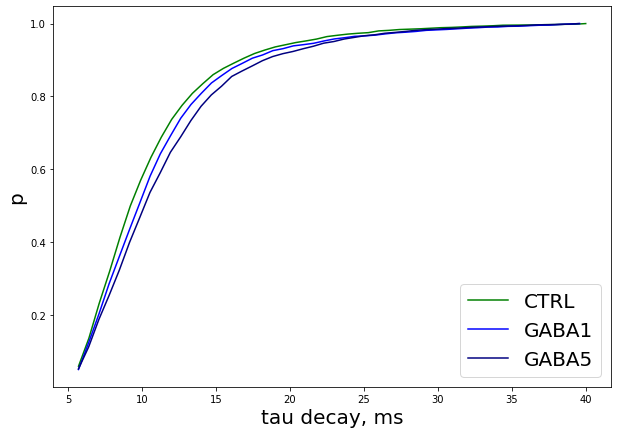

In [18]:
count, bins_count = np.histogram(np.array(cum_tau_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_tau_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_tau_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('tau decay, ms', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_tau_p.png")
plt.savefig('AD_common_res/'"cum_tau_p.pdf")
plt.show()

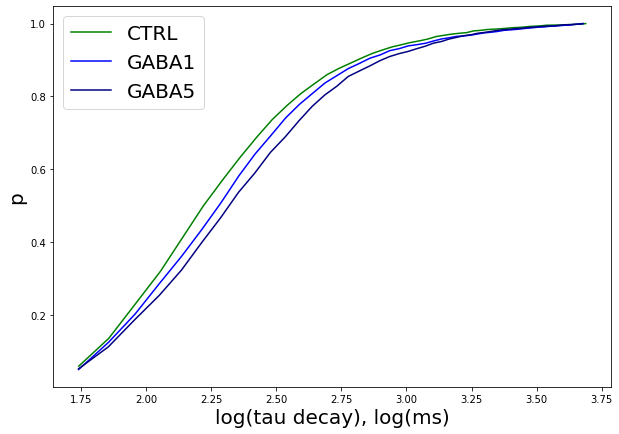

In [19]:
count, bins_count = np.histogram(np.array(cum_tau_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(np.log(bins_count[1:]), cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_tau_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_tau_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('log(tau decay), log(ms)', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_tau_logp.png")
plt.savefig('AD_common_res/'"cum_tau_logp.pdf")
plt.show()

In [20]:
cum_rise_ctrl = result_3ser[result_3ser['series'] == 'CTRL']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'CTRL']['rise_rate_10_90'])]
cum_rise_gaba1 = result_3ser[result_3ser['series'] == 'GABA1']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA1']['rise_rate_10_90'])]
cum_rise_gaba5 = result_3ser[result_3ser['series'] == 'GABA5']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA5']['rise_rate_10_90'])]

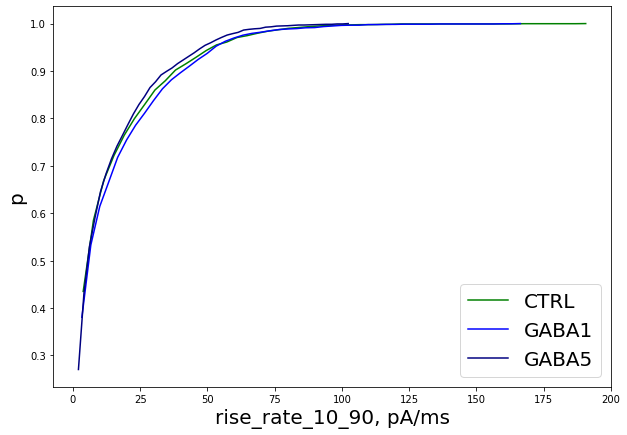

In [21]:
count, bins_count = np.histogram(np.array(cum_rise_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_rise_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_rise_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('rise_rate_10_90, pA/ms', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_rise_p.png")
plt.savefig('AD_common_res/'"cum_rise_p.pdf")
plt.show()

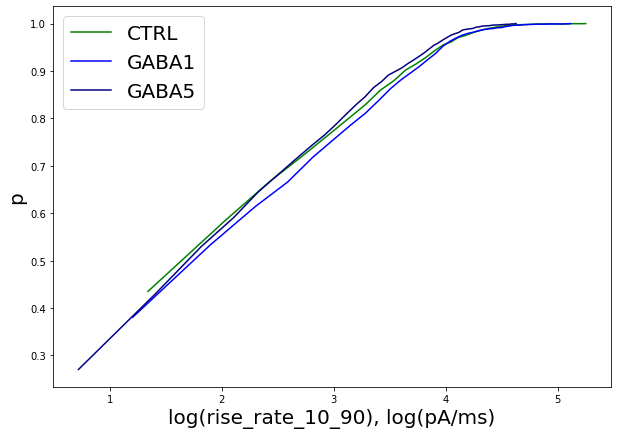

In [22]:
count, bins_count = np.histogram(np.array(cum_rise_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(np.log(bins_count[1:]), cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_rise_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_rise_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('log(rise_rate_10_90), log(pA/ms)', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_rise_logp.png")
plt.savefig('AD_common_res/'"cum_rise_logp.pdf")
plt.show()

In [31]:
spont_freq_cell1 = pd.read_csv(r'Cell 1 ad4\spont_freqs.csv')
spont_freq_cell2 = pd.read_csv(r'Cell 2 ad4\spont_freqs.csv')
spont_freq_cell3 = pd.read_csv(r'Cell 3 ad4\spont_freqs.csv')
spont_freq_cell4 = pd.read_csv(r'Cell 4 ad4\spont_freqs.csv')
spont_freq_cell5 = pd.read_csv(r'Cell 5 ad4\spont_freqs.csv')
spont_freq_cell6 = pd.read_csv(r'Cell 6 ad4\spont_freqs.csv')
spont_freq_cell7 = pd.read_csv(r'Cell 7 ad4\spont_freqs.csv')

In [32]:
ar_ctrl = [spont_freq_cell1[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell5[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2]]
spont_fr_ctrl = []
for ar in ar_ctrl:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_ctrl.append(ar[k][i])
spont_fr_ctrl_no_nan = [item for item in spont_fr_ctrl if not(math.isnan(item)) == True]

In [33]:
ar_gaba1 = [spont_freq_cell1[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell5[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2]]
spont_fr_gaba1 = []
for ar in ar_gaba1:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba1.append(ar[k][i])
spont_fr_gaba1_no_nan = [item for item in spont_fr_gaba1 if not(math.isnan(item)) == True]

In [34]:
ar_gaba5 = [spont_freq_cell1[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell5[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2]]
spont_fr_gaba5 = []
for ar in ar_gaba5:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba5.append(ar[k][i])
spont_fr_gaba5_no_nan = [item for item in spont_fr_gaba5 if not(math.isnan(item)) == True]

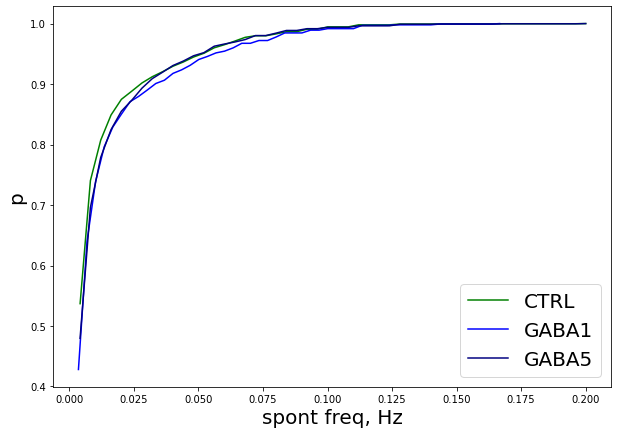

In [35]:
count, bins_count = np.histogram(np.array(np.array(spont_fr_ctrl_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(np.array(spont_fr_gaba1_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(np.array(spont_fr_gaba5_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('spont freq, Hz', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_spont_freq.png")
plt.savefig('AD_common_res/'"cum_spont_freq.pdf")
plt.show()